In [49]:
from lblcrn.bulk_crn import *
from lblcrn.spec.crn import *
from lblcrn.experiments.xps_io import *
from lblcrn.experiments.solution_system import *
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid

In [50]:
sm = SpeciesManager()

v_3n_nh2 = sm.sp('v_3n_nh2', Orbital('1s', 535.0))
v_h2 = sm.sp('v_h2', Orbital('1s', 532.2))
v_3n_nh2_2h = sm.sp('v_3n_nh2_2h', Orbital('1s', 530.9))
v_3n_nh3_h = sm.sp('v_3n_nh3_h', Orbital('1s', 530.0))
v_3n_h = sm.sp('v_3n_h', Orbital('1s', 530.0))
v_nh3 = sm.sp('v_nh3', Orbital('1s', 530.0))
v_2n_nh = sm.sp('v_2n_nh', Orbital('1s', 530.0))
v_2n_nh_2h = sm.sp('v_2n_nh_2h', Orbital('1s', 530.0))
v_2n_nh2_h = sm.sp('v_2n_nh2_h', Orbital('1s', 530.0))
v_2n_nh3 = sm.sp('v_2n_nh3', Orbital('1s', 530.0))
v_2n = sm.sp('v_2n', Orbital('1s', 530.0))
v_n2 = sm.sp('v_n2', Orbital('1s', 530.0))
v_2n_n2 = sm.sp('v_2n_n2', Orbital('1s', 530.0))
v_4n = sm.sp('v_4n', Orbital('1s', 530.0))
v_3n_nh_h = sm.sp('v_3nh_h', Orbital('1s', 530.0))
v_3n_nh2 = sm.sp('v_3nh2', Orbital('1s', 530.0))
v_2n_2h = sm.sp('v_2n_2h', Orbital('1s', 530.0))


constants = [7.67e8, 1.41e13, 2.6e6, 2.48e4, 1.03e7, 6.66e2, 1.84e6, 7.2e9, 7.67e8, 3.04e9, 1.6e11, 1.1e6, 1.14e0, 7.79e5,
            3.91e5, 3.14e3, 8.69e6, 4.1e7, 7.2e9, 1.35, 2.77e5, 6.45e8, 1.41e13, 7.67e8, 7.67e8, 1.48e4]
#constants = [10e-9 * c for c in constants]

In [51]:
def rsys_generator(scaled):
    rsys = RxnSystem(
        RevRxn(v_3n_nh2 + v_h2, v_3n_nh2_2h, scaled[0], scaled[1]),
        RevRxn(v_3n_nh2_2h, v_3n_nh3_h, scaled[2], scaled[3]),
        RevRxn(v_3n_nh3_h, v_3n_h + v_nh3, scaled[4], scaled[5]),
        RevRxn(v_3n_h, v_2n_nh, scaled[6], scaled[7]),
        RevRxn(v_2n_nh + v_h2, v_2n_nh_2h, scaled[8], scaled[9]),
        RevRxn(v_2n_nh_2h, v_2n_nh2_h, scaled[10], scaled[11]),
        RevRxn(v_2n_nh2_h, v_2n_nh3, scaled[12], scaled[13]),
        RevRxn(v_2n_nh3, v_2n + v_nh3, scaled[14], scaled[15]),
        RevRxn(v_2n + v_n2, v_2n_n2, scaled[16], scaled[17]),
        RevRxn(v_2n_n2, v_4n, scaled[18], scaled[19]),
        RevRxn(v_4n + v_h2, v_3n_nh_h, scaled[20], scaled[21]),
        RevRxn(v_3n_nh_h, v_3n_nh2, scaled[22], scaled[23]),
        RevRxn(v_2n + v_h2, v_2n_2h, scaled[24], scaled[25]),

        Conc(v_n2, 5),
        Conc(v_h2, 15),
        Conc(v_3n_nh2, 1), # 2-20 range
        sm
    )
    return rsys

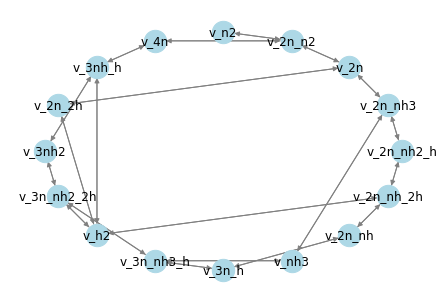

In [52]:
rsys = rsys_generator([0]*26).network_graph_plot()

# Ignore h2

In [53]:
rsys = rsys_generator(constants)
s, ts = simulate.simulate_xps_with_cts(rsys, time=200, title="Haber-Bosch")

[-767000000.0*v_2n*v_h2 - 8690000.0*v_2n*v_n2 - 3140.0*v_2n*v_nh3 + 14800.0*v_2n_2h + 41000000.0*v_2n_n2 + 391000.0*v_2n_nh3, 767000000.0*v_2n*v_h2 - 14800.0*v_2n_2h, 8690000.0*v_2n*v_n2 - 7241000000.0*v_2n_n2 + 1.35*v_4n, -767000000.0*v_2n_nh*v_h2 - 7200000000.0*v_2n_nh + 3040000000.0*v_2n_nh_2h + 1840000.0*v_3n_h, -1100001.14*v_2n_nh2_h + 779000.0*v_2n_nh3 + 160000000000.0*v_2n_nh_2h, 3140.0*v_2n*v_nh3 + 1.14*v_2n_nh2_h - 1170000.0*v_2n_nh3, 767000000.0*v_2n_nh*v_h2 + 1100000.0*v_2n_nh2_h - 163040000000.0*v_2n_nh_2h, 7200000000.0*v_2n_nh - 666.0*v_3n_h*v_nh3 - 1840000.0*v_3n_h + 10300000.0*v_3n_nh3_h, -14100002600000.0*v_3n_nh2_2h + 24800.0*v_3n_nh3_h + 767000000.0*v_3nh2*v_h2, 666.0*v_3n_h*v_nh3 + 2600000.0*v_3n_nh2_2h - 10324800.0*v_3n_nh3_h, 14100000000000.0*v_3n_nh2_2h - 767000000.0*v_3nh2*v_h2 - 767000000.0*v_3nh2 + 14100000000000.0*v_3nh_h, 767000000.0*v_3nh2 - 14100645000000.0*v_3nh_h + 277000.0*v_4n*v_h2, 7200000000.0*v_2n_n2 + 645000000.0*v_3nh_h - 277000.0*v_4n*v_h2 - 1.35*

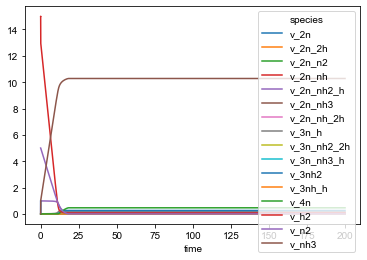

In [54]:
ts.plot()

In [55]:
ts.at(1e-9)

species
v_2n           6.480589e-18
v_2n_2h        2.219509e-17
v_2n_n2        2.267784e-15
v_2n_nh        2.877069e-13
v_2n_nh2_h     8.983320e-13
v_2n_nh3       2.704319e-22
v_2n_nh_2h     1.992217e-14
v_3n_h         3.382088e-09
v_3n_nh2_2h    8.151901e-04
v_3n_nh3_h     9.926133e-07
v_3nh2         9.991130e-01
v_3nh_h        5.434643e-05
v_4n           1.644991e-05
v_h2           1.499920e+01
v_n2           5.000000e+00
v_nh3          3.383294e-09
Name: 4.699942542156233e-10, dtype: float64

In [71]:
sampled = []
x_range = []
for i in range(len(ts.at(0))):
    sampled.append([])
for i in range(20001):
    x = ts.at(i*1e-7)
    x_range.append(i*1e-7)
    for j in range(len(x)):
        sampled[j].append(x[j])
        

In [72]:
tt = ts.at(100)
tt.keys()[0]

v_2n

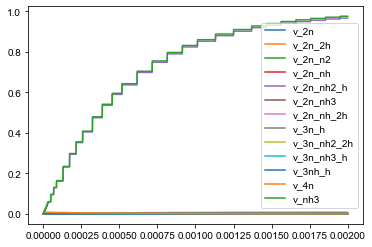

In [73]:
start = ts.at(0)
for i in range(len(start)):
    if str(start.keys()[i]) in ["v_h2", "v_n2", "v_3nh2"]:
        continue
    plt.plot(x_range, sampled[i], label=start.keys()[i])
plt.legend()
plt.show()

In [74]:
# Run for 1000ns or larger (orders of mag), play with n2:h2 ratio
# turnover frequency for nh3/second should be 10 per 3nnh2
# 4n and 2n should be larger than the rest